In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Input, concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define the Inception module
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    conv1 = Conv2D(f1, (1, 1), padding='same', activation='relu')(x)

    conv3 = Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    conv3 = Conv2D(f3_out, (3, 3), padding='same', activation='relu')(conv3)

    conv5 = Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    conv5 = Conv2D(f5_out, (5, 5), padding='same', activation='relu')(conv5)

    pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool = Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(pool)

    output = concatenate([conv1, conv3, conv5, pool], axis=3)
    return output


In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Build the model
input_layer = Input(shape=(32, 32, 3))
x = inception_module(input_layer, 32, 32, 64, 16, 32, 32)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

In [5]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3590 - loss: 1.8604 - val_accuracy: 0.5558 - val_loss: 1.2622
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6062 - loss: 1.1241 - val_accuracy: 0.6130 - val_loss: 1.1092
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6757 - loss: 0.9418 - val_accuracy: 0.6407 - val_loss: 1.0473
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7200 - loss: 0.8122 - val_accuracy: 0.6522 - val_loss: 1.0125
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7567 - loss: 0.6963 - val_accuracy: 0.6519 - val_loss: 1.0462


In [7]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6487 - loss: 1.0433
Test accuracy: 0.6484


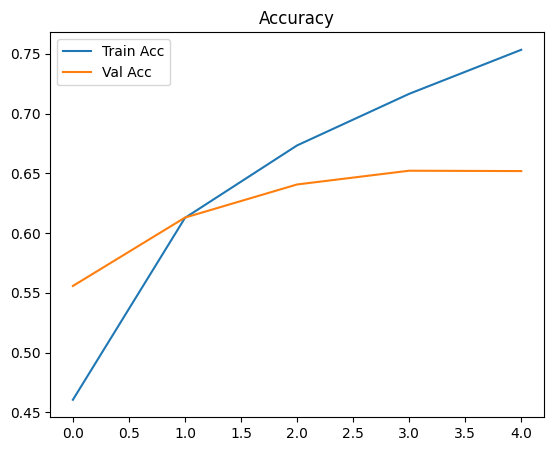

In [8]:
# Plot accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

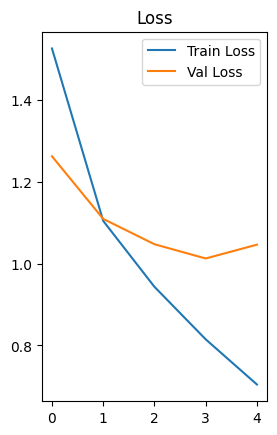

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [10]:
# Visualize some predictions
preds = model.predict(x_test[:10])
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


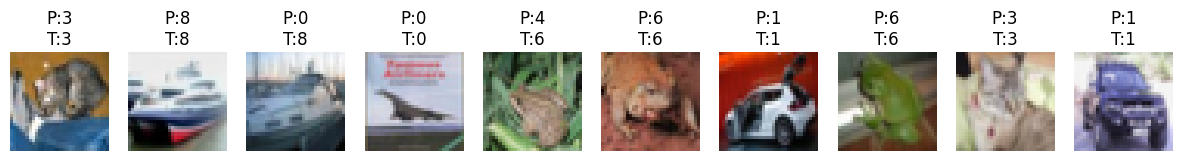

In [11]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"P:{pred_classes[i]}\nT:{true_classes[i]}")
    plt.axis('off')
plt.show()